In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_path(path):
    base = os.path.basename(path)
    return base.split('log_')[1].split('_')[0]

def plot_continual(paths):
    # single-task maxima from eval_curr_policy (normalization)
    maxes = {
        'Hopper-v5':  pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv")[:1000]['eval_curr_policy'].max(),
        'Swimmer-v5': pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv")[:1000]['eval_curr_policy'].max(),
        'Walker2d-v5':pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv")[:1000]['eval_curr_policy'].max()
    }

    task_names = [extract_path(p) for p in paths]
    dfs = [pd.read_csv(p)[:1000] for p in paths]

    # training curves: use eval_curr_policy for each task, filled; normalize
    seg_norm = []
    seg_len = []
    for name, df in zip(task_names, dfs):
        s = df['eval_curr_policy'].ffill().bfill() / maxes[name]
        seg_norm.append(s.reset_index(drop=True))
        seg_len.append(len(s))

    # concatenate segments into one timeline
    rewards = pd.concat(seg_norm, ignore_index=True)
    cuts = [0]
    for L in seg_len:
        cuts.append(cuts[-1] + L)

    plt.figure(figsize=(10, 5))

    # plot training segments
    for i, name in enumerate(task_names):
        start, end = cuts[i], cuts[i+1]
        plt.plot(range(start, end), rewards.iloc[start:end], label=name)

    # colors for overlayed evaluations
    line_colors = [line.get_color() for line in plt.gca().lines]

    # cross-evaluation: use {old_task}_avg_reward columns when present; normalize by old task max
    for j in range(1, len(dfs)):
        base = cuts[j]
        dfj = dfs[j]
        for k in range(j):
            col = f"{task_names[k]}_avg_reward"
            if col in dfj.columns:
                eval_df = dfj[['iteration', col]].dropna()
                if not eval_df.empty:
                    x = base + (eval_df['iteration'].astype(int) - 1)
                    y = eval_df[col].values / maxes[task_names[k]]
                    plt.plot(x, y, linestyle='-', color=line_colors[k])

    # task switch markers
    for c in cuts[1:-1]:
        plt.axvline(x=c, color='black', linestyle='--')

    plt.xlabel('Iteration')
    plt.ylabel('Normalized reward')
    plt.title('Continual Learning: training & evaluation curves')
    plt.legend()
    plt.tight_layout()
    plt.show()


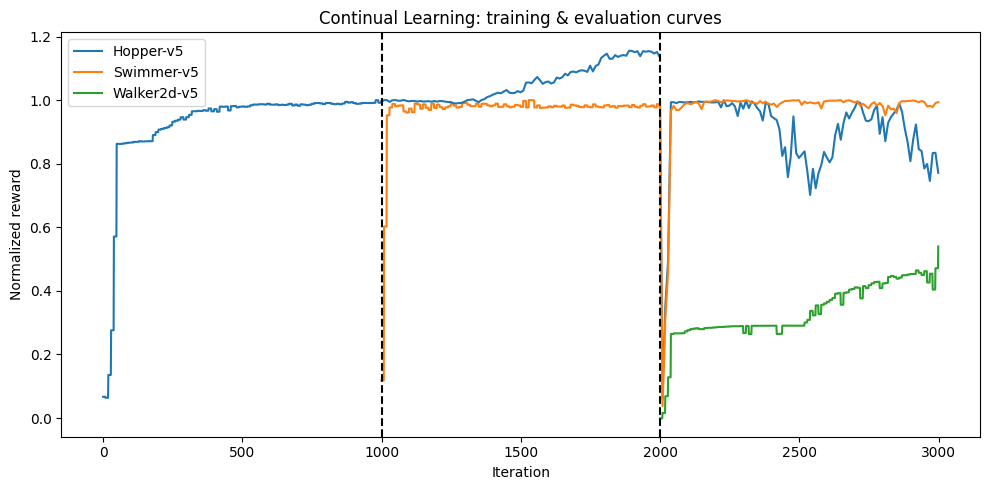

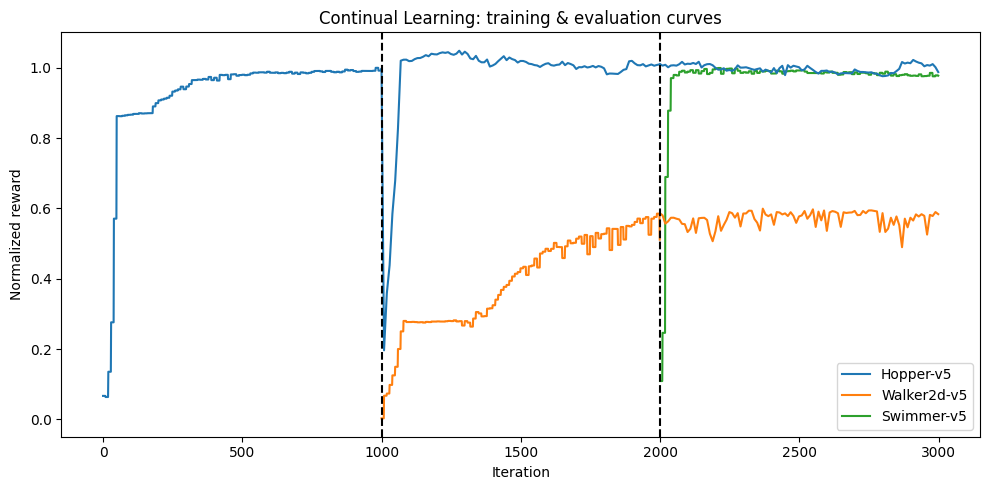

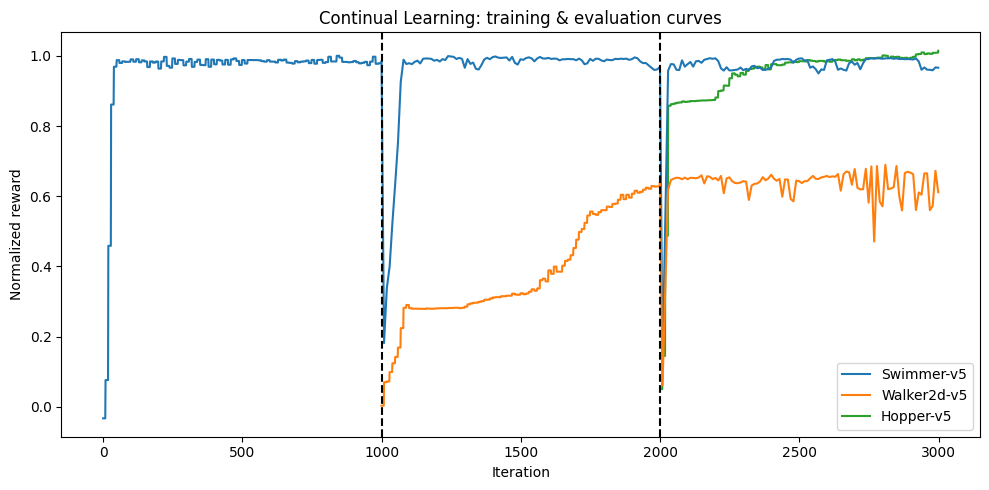

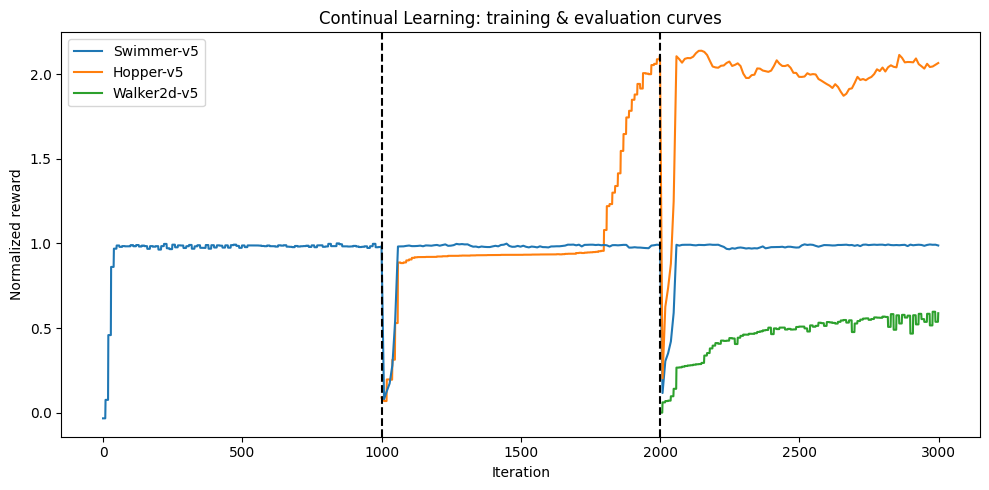

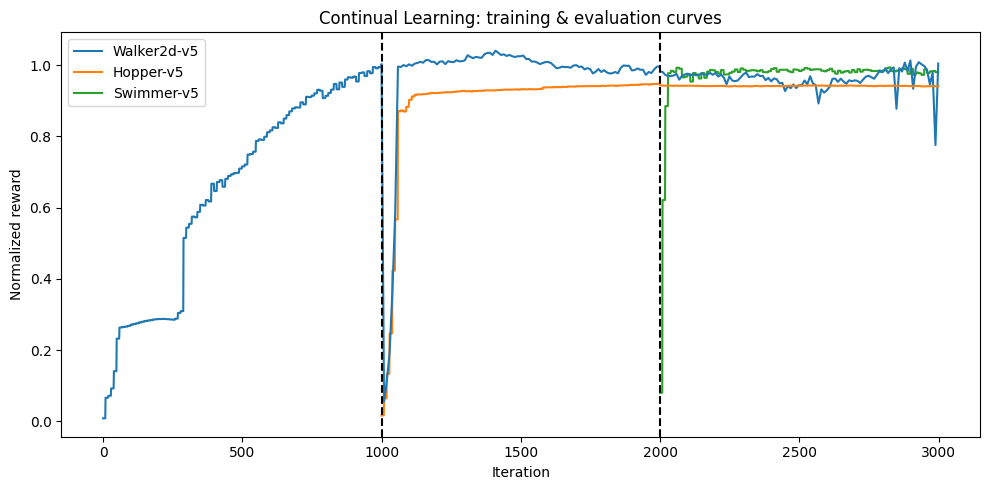

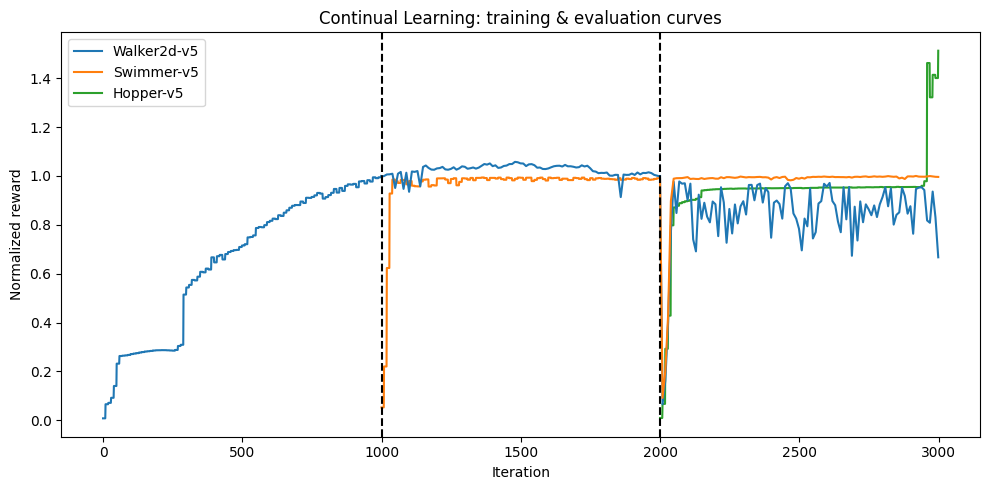

In [2]:
all_paths = [
    [
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv',
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Hopper-v5.csv',
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Hopper-v5_Swimmer-v5.csv'],
    [
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv',
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Hopper-v5.csv',
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Hopper-v5_Walker2d-v5.csv'
    ],
    [
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv',
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Swimmer-v5.csv',
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Swimmer-v5_Walker2d-v5.csv'
    ],
    [
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv',
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Swimmer-v5.csv',
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Swimmer-v5_Hopper-v5.csv'
    ],
    [
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv',
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Walker2d-v5.csv',
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Walker2d-v5_Hopper-v5.csv'
    ],
    [
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv',
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Walker2d-v5.csv',
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Walker2d-v5_Swimmer-v5.csv'
    ]
]

for paths in all_paths:
    plot_continual(paths)

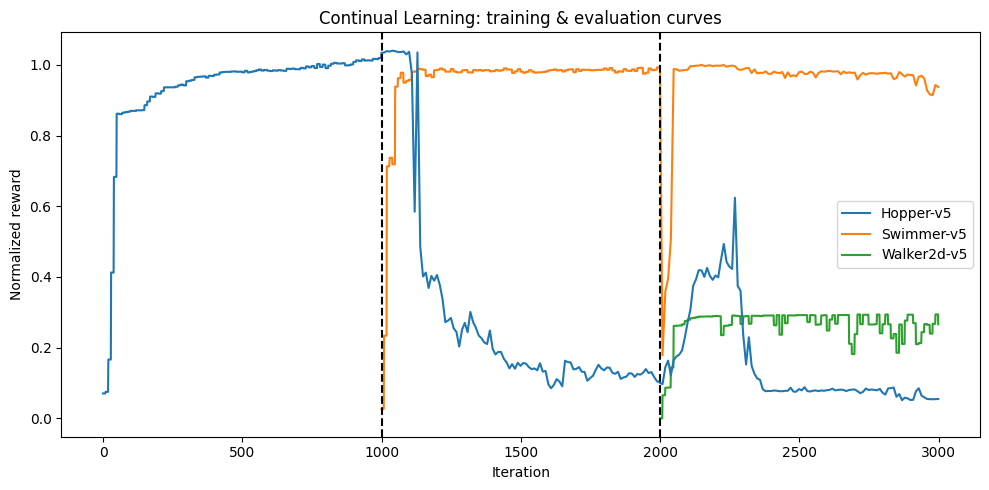

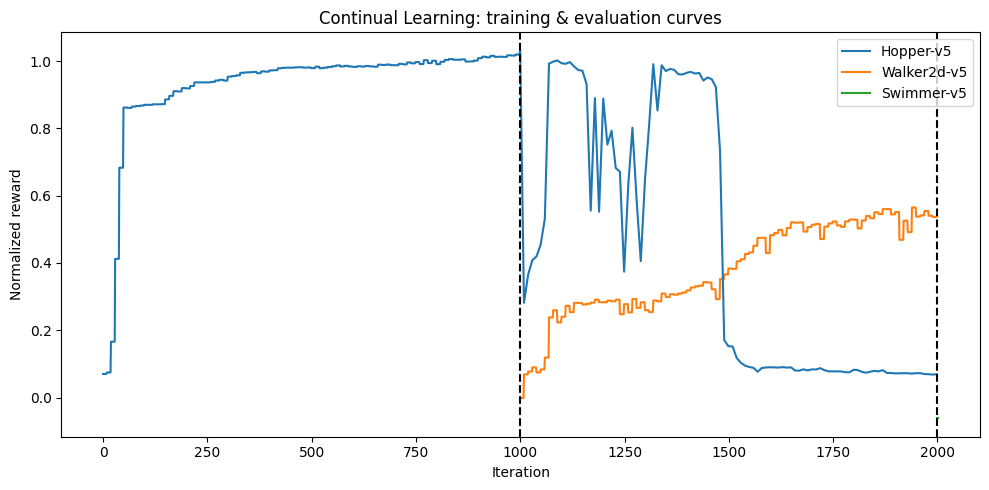

FileNotFoundError: [Errno 2] No such file or directory: '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue_shared_output.csv'

In [3]:
all_paths_shared_output = [
    [
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue_shared_output.csv',
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Hopper-v5_shared_output.csv',
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Hopper-v5_Swimmer-v5_shared_output.csv'],
    [
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue_shared_output.csv',
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Hopper-v5_shared_output.csv',
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Hopper-v5_Walker2d-v5_shared_output.csv'
    ],
    [
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue_shared_output.csv',
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Swimmer-v5_shared_output.csv',
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Swimmer-v5_Walker2d-v5_shared_output.csv'
    ],
    [
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue_shared_output.csv',
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Swimmer-v5_shared_output.csv',
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Swimmer-v5_Hopper-v5_shared_output.csv'
    ],
    [
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue_shared_output.csv',
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Walker2d-v5_shared_output.csv',
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Walker2d-v5_Hopper-v5_shared_output.csv'
    ],
    [
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue_shared_output.csv',
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Walker2d-v5_shared_output.csv',
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i1000_b32_w0.0_centered_amsTrue_Walker2d-v5_Swimmer-v5_shared_output.csv'
    ]
]

for paths in all_paths_shared_output:
    plot_continual(paths)

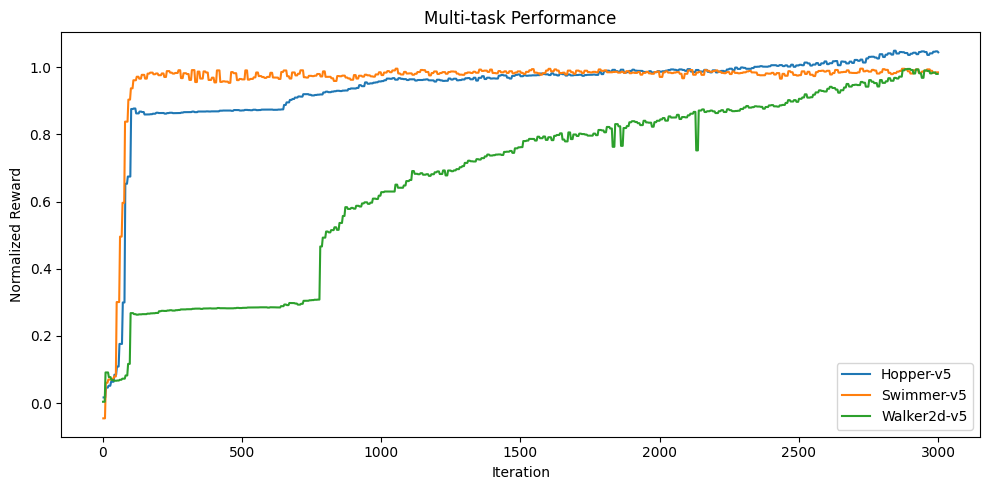

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_Swimmer-v5_Hopper-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv")

# Single-task maxima from eval_curr_policy
hopper_max_rew = pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv")[:1000]['eval_curr_policy'].max()
swimmer_max_rew = pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv")[:1000]['eval_curr_policy'].max()
walker_max_rew = pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv")[:1000]['eval_curr_policy'].max()

max_rews = {
    "Hopper-v5": hopper_max_rew,
    "Swimmer-v5": swimmer_max_rew,
    "Walker2d-v5": walker_max_rew
}

# Build per-row eval value from the corresponding env column; fill between evals
df['eval_value'] = np.nan
for env in max_rews.keys():
    col = f"{env}_eval_curr_policy"
    filled = df[col].ffill().bfill()
    df.loc[df['env'] == env, 'eval_value'] = filled

# Normalize
df['normalized_reward'] = df.apply(lambda r: r['eval_value'] / max_rews[r['env']], axis=1)

# Plot
plt.figure(figsize=(10, 5))
for env, group in df.groupby("env"):
    plt.plot(group["iteration"], group["normalized_reward"], label=env)

plt.xlabel("Iteration")
plt.ylabel("Normalized Reward")
plt.title("Multi-task Performance")
plt.legend()
plt.tight_layout()
plt.show()


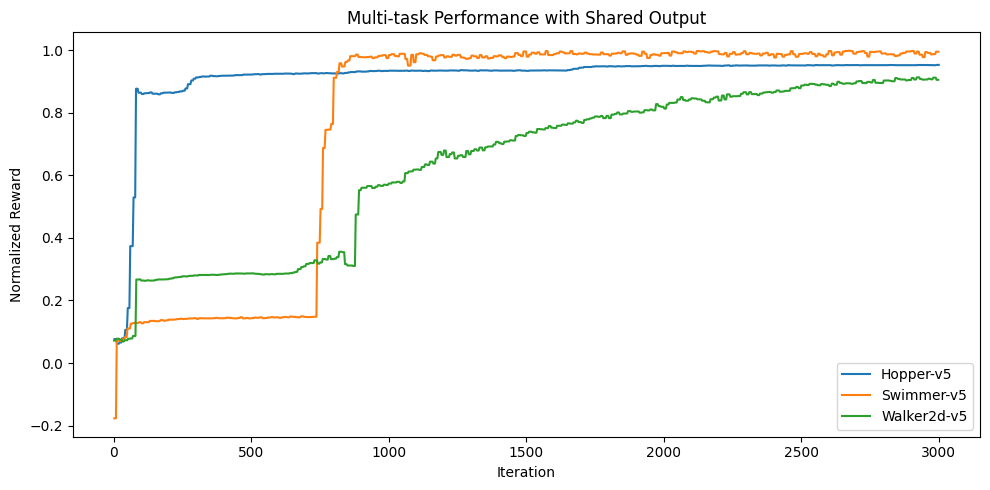

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_Swimmer-v5_Hopper-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue_shared_output.csv")

# Single-task maxima from eval_curr_policy
hopper_max_rew = pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv")[:1000]['eval_curr_policy'].max()
swimmer_max_rew = pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv")[:1000]['eval_curr_policy'].max()
walker_max_rew = pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv")[:1000]['eval_curr_policy'].max()

max_rews = {
    "Hopper-v5": hopper_max_rew,
    "Swimmer-v5": swimmer_max_rew,
    "Walker2d-v5": walker_max_rew
}

# Build per-row eval value from the corresponding env column; fill between evals
df['eval_value'] = np.nan
for env in max_rews.keys():
    col = f"{env}_eval_curr_policy"
    filled = df[col].ffill().bfill()
    df.loc[df['env'] == env, 'eval_value'] = filled

# Normalize
df['normalized_reward'] = df.apply(lambda r: r['eval_value'] / max_rews[r['env']], axis=1)

# Plot
plt.figure(figsize=(10, 5))
for env, group in df.groupby("env"):
    plt.plot(group["iteration"], group["normalized_reward"], label=env)

plt.xlabel("Iteration")
plt.ylabel("Normalized Reward")
plt.title("Multi-task Performance with Shared Output")
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
single_tasks = [
    "/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv",
    "/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv",
    "/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue.csv",
    '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_i3000_b32_w0.0_centered_amsTrue_shared_output.csv'
]

def plot_task(path):
    task_name = extract_path(path)
    df = pd.read_csv(path)

    # Use eval_curr_policy sampled every 10 iters; fill to get per-iter curve
    eval_series = df['eval_curr_policy'].ffill().bfill()

    # Normalize by the single-task max avg_reward (same baseline as before)
    max_rew = df['eval_curr_policy'].max()
    df['normalized_reward'] = eval_series / max_rew

    plt.figure(figsize=(10, 5))
    plt.plot(df['iteration'], df['normalized_reward'], label=task_name)
    plt.xlabel('Iteration')
    plt.ylabel('Normalized Average Reward')
    plt.title(f'{task_name} Training Performance')
    plt.legend()
    plt.tight_layout()
    plt.show()


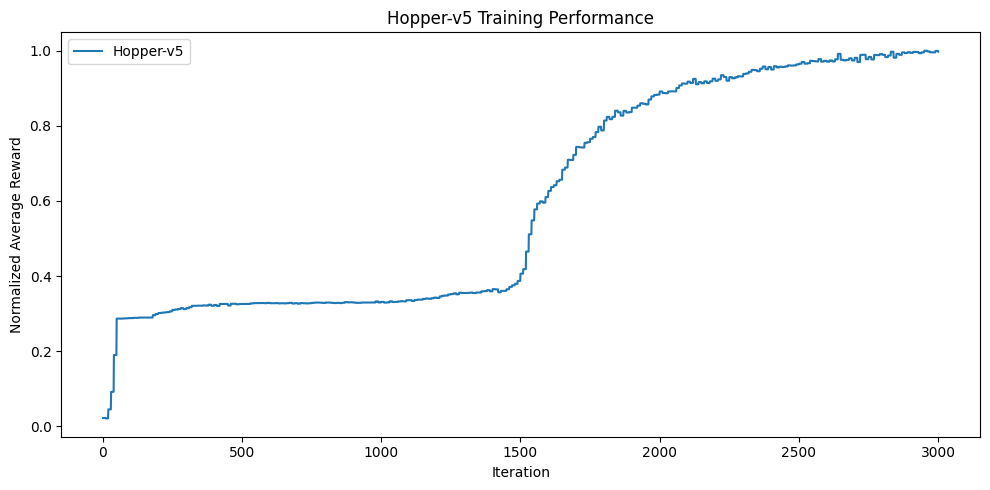

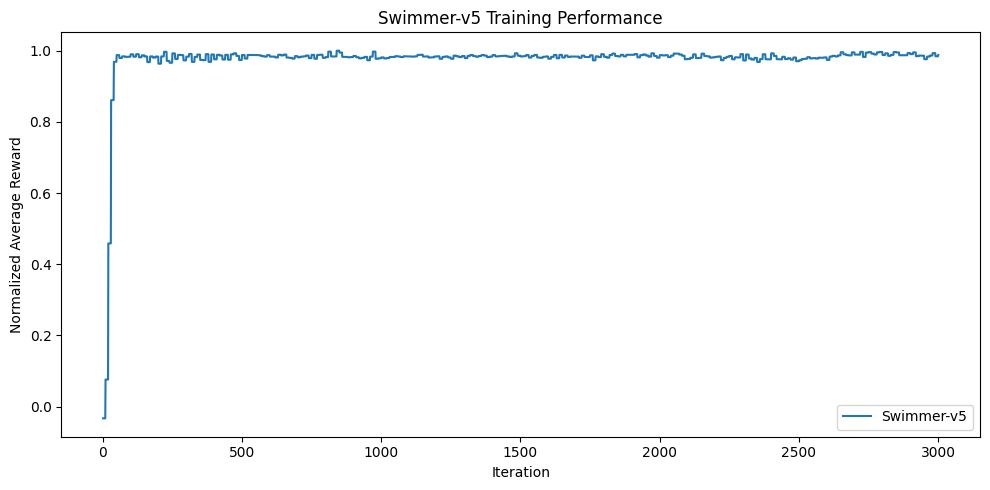

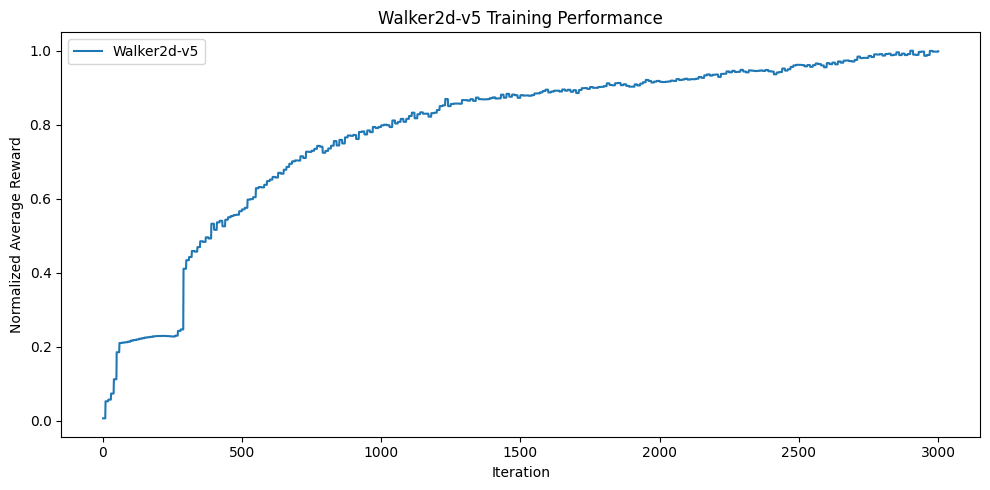

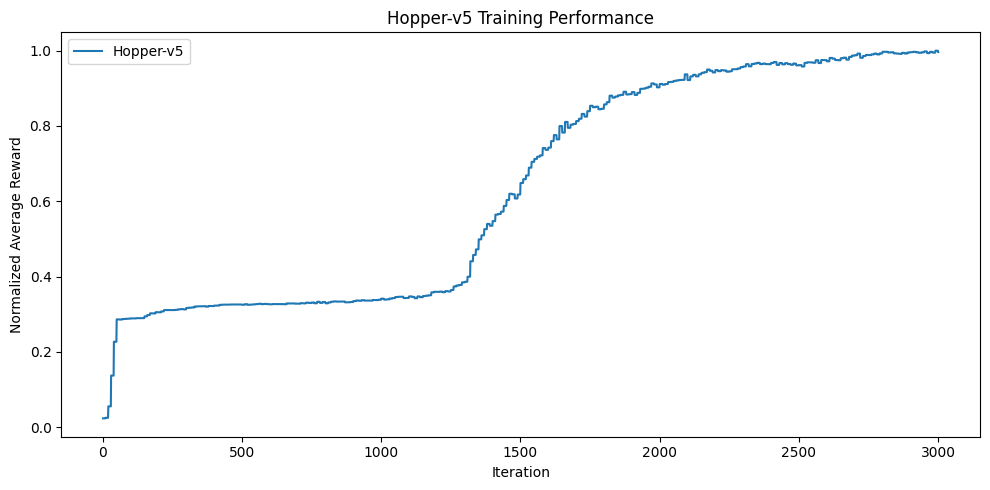

In [30]:
for task in single_tasks:
    plot_task(task)